<a href="https://colab.research.google.com/github/NiteeshSingh/DS-303-Course-Project/blob/main/KNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read the csv file using read_csv 
# method of pandas
#We have downloaded the past 1 year data of TSLA Industries Trading In NSE from Yahoo Finance Website
df = pd.read_csv(r"C:\Users\Manchand\Downloads\TSLA(2).csv")


In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-30,667.590027,715.469971,666.140015,709.440002,709.440002,40758700
1,2021-05-03,703.799988,706.000000,680.500000,684.900024,684.900024,27043100
2,2021-05-04,678.940002,683.450012,657.700012,673.599976,673.599976,29739300
3,2021-05-05,681.059998,685.299988,667.340027,670.940002,670.940002,21901900
4,2021-05-06,680.760010,681.020020,650.000000,663.539978,663.539978,27784600
5,2021-05-07,665.799988,690.000000,660.219971,672.369995,672.369995,23469200
6,2021-05-10,664.900024,665.049988,627.609985,629.039978,629.039978,31392400
7,2021-05-11,599.239990,627.099976,595.599976,617.200012,617.200012,46503900
8,2021-05-12,602.489990,620.409973,586.770020,589.890015,589.890015,33823600
9,2021-05-13,601.539978,606.460022,559.650024,571.690002,571.690002,44184900


In [ ]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df
  
# drop The original date column
df= df.drop(['Date'], axis='columns')
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-30,667.590027,715.469971,666.140015,709.440002,709.440002,40758700
2021-05-03,703.799988,706.000000,680.500000,684.900024,684.900024,27043100
2021-05-04,678.940002,683.450012,657.700012,673.599976,673.599976,29739300
2021-05-05,681.059998,685.299988,667.340027,670.940002,670.940002,21901900
2021-05-06,680.760010,681.020020,650.000000,663.539978,663.539978,27784600
2021-05-07,665.799988,690.000000,660.219971,672.369995,672.369995,23469200
2021-05-10,664.900024,665.049988,627.609985,629.039978,629.039978,31392400
2021-05-11,599.239990,627.099976,595.599976,617.200012,617.200012,46503900
2021-05-12,602.489990,620.409973,586.770020,589.890015,589.890015,33823600


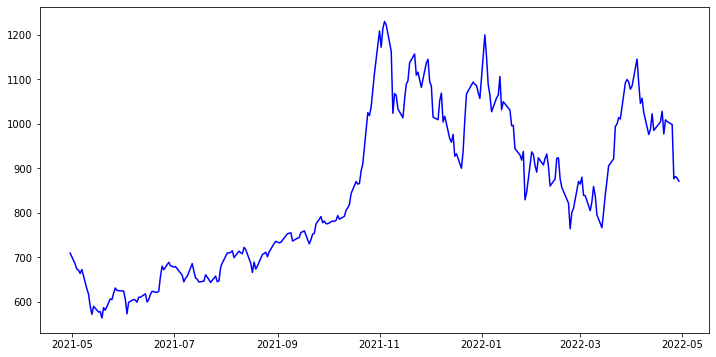

In [ ]:
#plotting the graph of date vs closing price
plt.figure(figsize=(12,6))
plt.plot(df['Close'],color='blue')

In [ ]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
df=df.dropna()
  
# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head(10)

,Open-Close,High-Low
Date,,
2021-04-30,-41.849975,49.329956
2021-05-03,18.899964,25.500000
2021-05-04,5.340026,25.750000
2021-05-05,10.119996,17.959961
2021-05-06,17.220032,31.020020
2021-05-07,-6.570007,29.780029
2021-05-10,35.860046,37.440003
2021-05-11,-17.960022,31.500000
2021-05-12,12.599975,33.639953


In [ ]:
X=df[['Open-Close','High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2021-04-30,-41.849975,49.329956
2021-05-03,18.899964,25.500000
2021-05-04,5.340026,25.750000
2021-05-05,10.119996,17.959961
2021-05-06,17.220032,31.020020


In [ ]:
# Define Target variables  that our model will predict
#If tomorrow’s price is greater than today’s price then we will buy the particular Stock 
#else we will have no position in buying. We will store +1 for a buy signal 
#-1 for a no position in y.
y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)
y

array([-1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
        1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,
       -1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,
        1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,
       -1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
       -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
#Split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y ,test_size=0.25,random_state=44)

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
parameters={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn =neighbors.KNeighborsClassifier()
model=GridSearchCV(knn,parameters,cv=5)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(predictions)

[-1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1  1  1 -1  1 -1 -1 -1  1  1
  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1
 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1]


#  Classifier accuracy

In [ ]:
accuracy_train=accuracy_score(y_train , model.predict(X_train))
accuracy_test=accuracy_score(y_test , model.predict(X_test))
print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.73
Test_data Accuracy: 0.47


# Comparing Actual and Predicted values

In [ ]:
predictions_classification= model.predict(X_test)
actual_predicted_data=pd.DataFrame({'Actual Class':y_test,'Predicted Class':predictions_classification})
actual_predicted_data.head(10)

,Actual Class,Predicted Class
0,1,-1
1,1,-1
2,-1,-1
3,-1,-1
4,-1,-1
5,-1,-1
6,-1,-1
7,1,-1
8,-1,1
9,-1,-1


# KNN Regression 

In [ ]:
y=df['Close']

In [ ]:
y.head(10)

Date
2021-04-30    709.440002
2021-05-03    684.900024
2021-05-04    673.599976
2021-05-05    670.940002
2021-05-06    663.539978
2021-05-07    672.369995
2021-05-10    629.039978
2021-05-11    617.200012
2021-05-12    589.890015
2021-05-13    571.690002
Name: Close, dtype: float64

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train_reg,X_test_reg, y_train_reg,y_test_reg= train_test_split(X,y ,test_size=0.25,random_state=44)
parameters={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg=neighbors.KNeighborsRegressor()
model_reg=GridSearchCV(knn_reg,parameters,cv=5)
model_reg.fit(X_train_reg,y_train_reg)
predictions=model_reg.predict(X_test_reg)
print(predictions)

[1016.68784886  680.43357193  758.70714029  879.31856879  781.64285279
  758.70714029  851.0635725   671.58785129  954.20856571  741.26357157
  907.36141957  942.97571236  833.90499886  702.9928545  1008.40357314
  843.37356557  692.2521405   775.52071271  674.3078525   965.27785379
  818.6978585   789.3907165   988.14285279  911.539276    865.24214821
  705.52500257  717.01142664  810.447148    822.87356557  717.26856771
  769.18214636  861.08214893  774.28214379  989.2335685   708.41070993
  876.99999579  721.77214264  718.56428307  802.02428336  746.04500471
  801.71143014 1005.37928557  744.65856936 1045.527845    695.73070414
  685.8228585   781.91071871  737.87928121 1036.88785236  807.6328605
  813.919996    917.3485675   752.52213836 1057.91070543  958.69427493
  807.6328605   921.70071414  725.99642943  964.42928643  935.58570629
  694.33500457  942.22141814 1008.7385645   909.73641964]


# Comparing Actual and predicted values

In [ ]:
Regr=pd.DataFrame({'Actual Closing Value':y_test_reg,'Predicted Closing Value':predictions})
Regr.head(10)

,Actual Closing Value,Predicted Closing Value
Date,,
2021-10-26,1018.429993,1016.687849
2021-07-28,646.979980,680.433572
2021-07-14,653.380005,758.707140
2022-02-18,856.979980,879.318569
2021-05-11,617.200012,781.642853
2022-04-08,1025.489990,758.707140
2021-07-02,678.900024,851.063572
2021-07-01,677.919983,671.587851
2021-12-15,975.989990,954.208566


# plotting the curve between actual and predicted values

Text(0, 0.5, 'Prices')

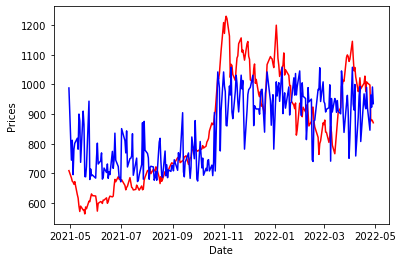

In [ ]:
plt.plot(X.index,np.stack(y.values),color='red', label='Data')
plt.plot(X.index,model_reg.predict(X),color='blue', label='model predicton')
plt.xlabel('Date')
plt.ylabel('Prices')